In [67]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7d43e0df1295f4fc7372156139bb23fd


In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)
coordinates

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | eyl
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | hami
Processing Record 8 of Set 1 | vestmanna
Processing Record 9 of Set 1 | floresti
Processing Record 10 of Set 1 | gigmoto
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | pangkalanbuun
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | lolua
City not found. Skipping...
Processing Record 20 of Set 1 | xiaoweizhai
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | plettenberg bay
Processing Record 23 

In [22]:
len(city_data)

565

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.00,64,0,0.43,AU,2020-10-25 20:08:00
1,Chuy,-33.70,-53.46,71.56,79,100,15.39,UY,2020-10-25 20:08:00
2,Ushuaia,-54.80,-68.30,51.80,50,40,3.36,AR,2020-10-25 20:06:17
3,Hithadhoo,-0.60,73.08,82.98,71,27,5.39,MV,2020-10-25 20:08:01
4,Eyl,7.98,49.82,78.37,69,54,10.00,SO,2020-10-25 20:08:01
5,Avarua,-21.21,-159.78,75.20,73,49,11.41,CK,2020-10-25 20:08:01
6,Hami,42.80,93.45,37.60,69,2,4.23,CN,2020-10-25 20:08:02
7,Vestmanna,62.16,-7.17,44.60,87,4,8.05,FO,2020-10-25 20:08:02
8,Floresti,47.89,28.30,55.89,74,100,6.78,MD,2020-10-25 20:08:02
9,Gigmoto,13.78,124.39,79.27,87,100,22.24,PH,2020-10-25 20:05:11


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-10-25 20:08:00,-33.65,115.33,55.00,64,0,0.43
1,Chuy,UY,2020-10-25 20:08:00,-33.70,-53.46,71.56,79,100,15.39
2,Ushuaia,AR,2020-10-25 20:06:17,-54.80,-68.30,51.80,50,40,3.36
3,Hithadhoo,MV,2020-10-25 20:08:01,-0.60,73.08,82.98,71,27,5.39
4,Eyl,SO,2020-10-25 20:08:01,7.98,49.82,78.37,69,54,10.00
5,Avarua,CK,2020-10-25 20:08:01,-21.21,-159.78,75.20,73,49,11.41
6,Hami,CN,2020-10-25 20:08:02,42.80,93.45,37.60,69,2,4.23
7,Vestmanna,FO,2020-10-25 20:08:02,62.16,-7.17,44.60,87,4,8.05
8,Floresti,MD,2020-10-25 20:08:02,47.89,28.30,55.89,74,100,6.78
9,Gigmoto,PH,2020-10-25 20:05:11,13.78,124.39,79.27,87,100,22.24


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Create Scatter Plots for STEM project

In [27]:
# Extract relevant fields from the DataFrame for plotting.
# pulling out the lists from the dataframe created above
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


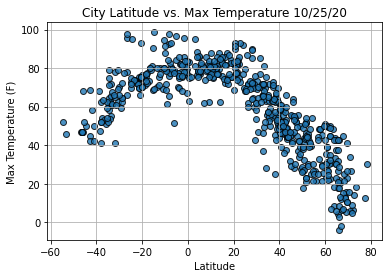

In [29]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

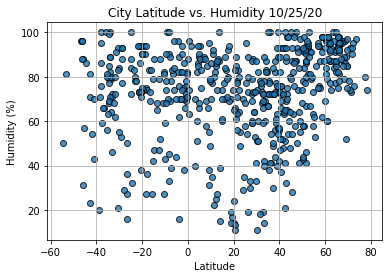

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

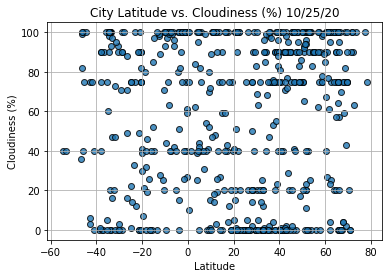

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

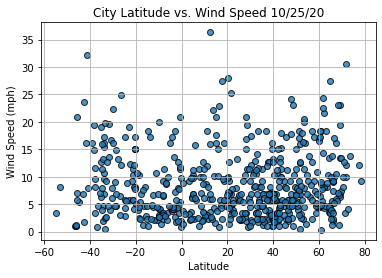

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [75]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

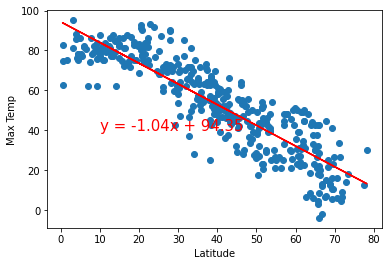

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,40))

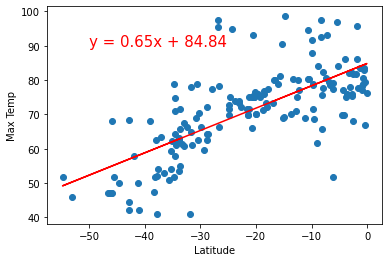

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

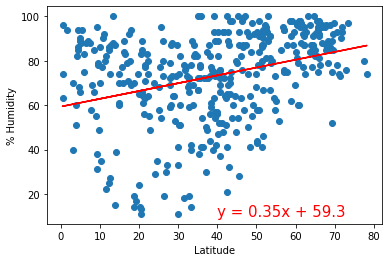

LinregressResult(slope=0.35197100124845543, intercept=59.30104282954325, rvalue=0.32989937462854957, pvalue=1.6552359724520085e-11, stderr=0.05074072671255341)

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Humidity", '% Humidity',(40,10))

linregress(x_values, y_values)

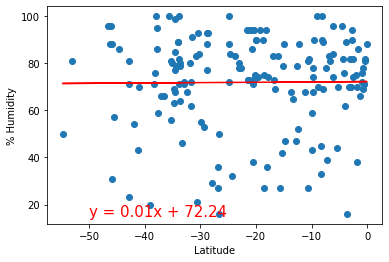

LinregressResult(slope=0.01461855043404195, intercept=72.23531791530927, rvalue=0.010177272799460261, pvalue=0.8955174131086665, stderr=0.11114557229331294)

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',
                       (-50,15))

linregress(x_values, y_values)

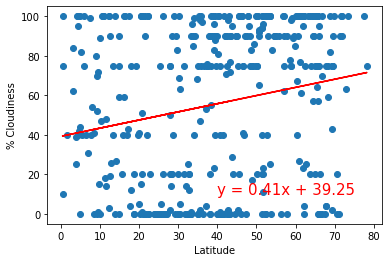

LinregressResult(slope=0.4126776046608502, intercept=39.24993892726647, rvalue=0.2024992053818884, pvalue=4.9267663749605064e-05, stderr=0.10054197870325976)

In [63]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',
                       (40,10))

linregress(x_values, y_values)

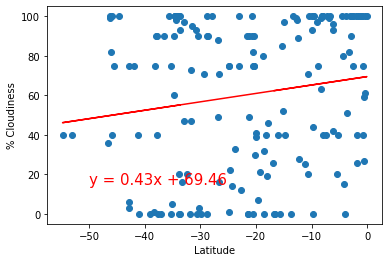

LinregressResult(slope=0.4253505459156793, intercept=69.46385869288335, rvalue=0.1578233278962841, pvalue=0.040429102904915214, stderr=0.2059398128321907)

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',
                       (-50,15))

linregress(x_values, y_values)

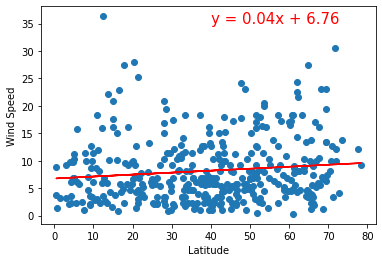

LinregressResult(slope=0.035804392251662855, intercept=6.764660083406632, rvalue=0.11838237917307436, pvalue=0.01844185839929692, stderr=0.0151299126388597)

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))
plt.show()
linregress(x_values, y_values)

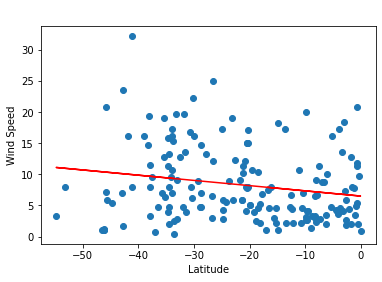

LinregressResult(slope=-0.08390330949826477, intercept=6.515641329414311, rvalue=-0.19539696422399147, pvalue=0.010899728667579331, stderr=0.03258741802254512)

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

linregress(x_values, y_values)